In [ ]:
!pip3 install googletrans==3.1.0a0
!pip install vaderSentiment
!pip install autocorrect
!pip install deep_translator
!pip install researchpy
!pip install --upgrade scikit-learn
!pip install -U imbalanced-learn
!pip install --upgrade scikit-learn imbalanced-learn
!pip install textblob
!pip install --upgrade openpyxl

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import numpy as np
from autocorrect import Speller
from googletrans import Translator, constants
from matplotlib import pyplot as plt
import re
from deep_translator import GoogleTranslator
from nltk.corpus import stopwords
from nltk import pos_tag
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import numpy as geek
import researchpy as rp
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from itertools import cycle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from textblob import TextBlob
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
from datetime import timedelta

In [ ]:
df = pd.read_excel("Iskon Data.xlsx")
df.head()

,REVIEW ID,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE
0,814,Trip Advisor,maryd1928,2013-01-02,Don't miss this Bangalore Temp,Don't miss this Gaudiya Vaishnava Temple locat...,5,POSITIVE
1,1181,Trip Advisor,maryd1928,2013-01-02,Don't miss this Bangalore Temple,Don't miss this Gaudiya Vaishnava Temple locat...,5,POSITIVE
2,813,Trip Advisor,shoubhik,2013-01-05,peacefull and devotional,This was my 2nd visit to the temple.. last tim...,4,POSITIVE
3,1182,Trip Advisor,shoubhik,2013-01-05,peacefull and devotional,This was my 2nd visit to the temple.. last tim...,4,POSITIVE
4,812,Trip Advisor,onthemoveBangalore,2013-01-10,Huge and Grand,The Iskcon temple is a rather grand and imposi...,5,POSITIVE


Identifying and Keeping the First Occurrence of Duplicate Reviews by the Same Person (identified by REVIEW BY) on the Same Day.

In [ ]:
df.sort_values(by=['REVIEW BY', 'REVIEW DATE'], inplace=True)

unique_df = df.drop_duplicates(subset=['REVIEW BY', 'REVIEW DATE'], keep='first')

unique_df.reset_index(drop=True, inplace=True)
unique_df.head()

,REVIEW ID,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE
0,656,Trip Advisor,3612,2014-04-30,To commercial,This reativly new temple was a big hindu versi...,2,NEGATIVE
1,2208,Trip Advisor,9573519851,2015-07-24,?Amazing temple in Bangalore?,Superr,5,POSITIVE
2,3989,Trip Advisor,0iamsid0,2017-01-03,Fully commercialized place,Giving 3 stars because I felt its more of a sh...,4,NEGATIVE
3,4561,Trip Advisor,1 All over,2017-04-02,Off the beaten path,A best peaceful place with great infrastructur...,5,POSITIVE
4,3334,Trip Advisor,10vee,2016-08-29,Peaceful and Serene place,Tranquility in the midst of the busiest place....,5,POSITIVE


In [ ]:
len(unique_df)

4645

Identify and Keeping the First Occurrence of Reviews by the Same Person (identified by REVIEW BY) Within a 7-day Interval.

In [ ]:
def remove_duplicates(df, days_interval=7):

    indices_to_keep = []
    df.sort_values(by=['REVIEW BY', 'REVIEW DATE'], inplace=True)

    for _, group in df.groupby('REVIEW BY'):
        last_date = None
        for idx, row in group.iterrows():
            if last_date is None or (row['REVIEW DATE'] - last_date) > timedelta(days=days_interval):
                last_date = row['REVIEW DATE']
                indices_to_keep.append(idx)
    return df.loc[indices_to_keep]

unique_reviews = remove_duplicates(unique_df)
unique_reviews.head()

,REVIEW ID,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE
0,656,Trip Advisor,3612,2014-04-30,To commercial,This reativly new temple was a big hindu versi...,2,NEGATIVE
1,2208,Trip Advisor,9573519851,2015-07-24,?Amazing temple in Bangalore?,Superr,5,POSITIVE
2,3989,Trip Advisor,0iamsid0,2017-01-03,Fully commercialized place,Giving 3 stars because I felt its more of a sh...,4,NEGATIVE
3,4561,Trip Advisor,1 All over,2017-04-02,Off the beaten path,A best peaceful place with great infrastructur...,5,POSITIVE
4,3334,Trip Advisor,10vee,2016-08-29,Peaceful and Serene place,Tranquility in the midst of the busiest place....,5,POSITIVE


In [ ]:
unique_reviews.dropna()

,REVIEW ID,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE
0,656,Trip Advisor,3612,2014-04-30,To commercial,This reativly new temple was a big hindu versi...,2,NEGATIVE
1,2208,Trip Advisor,9573519851,2015-07-24,?Amazing temple in Bangalore?,Superr,5,POSITIVE
2,3989,Trip Advisor,0iamsid0,2017-01-03,Fully commercialized place,Giving 3 stars because I felt its more of a sh...,4,NEGATIVE
3,4561,Trip Advisor,1 All over,2017-04-02,Off the beaten path,A best peaceful place with great infrastructur...,5,POSITIVE
4,3334,Trip Advisor,10vee,2016-08-29,Peaceful and Serene place,Tranquility in the midst of the busiest place....,5,POSITIVE
...,...,...,...,...,...,...,...,...
4638,2635,Trip Advisor,yuku_shiyo,2016-03-12,First temple I've visited,I had gone there early morning and was one of ...,4,POSITIVE
4639,2231,Trip Advisor,yuvaramraja,2015-08-17,?Peaceful place!!!!!!!!!!!?,Waiting for my lords birthday.. Preparation is...,5,POSITIVE
4640,389,Trip Advisor,yv_Shastry,2014-12-10,Clean but commercial,The temple is clean and the altitude of the Ha...,4,MIXED
4641,3790,Trip Advisor,yyyasssh,2016-12-03,Worship,Iskcon temples are available in almost all the...,5,POSITIVE


In [ ]:
len(unique_reviews)

4632

Implementing Standard Text Pre-processing Techniques: Contraction Replacement, Stop Words Removal, Number and Symbols Removal, Lowercasing, Slang Correction, Spell Correction, Translation to English, Stemming and Lemmatization.

In [ ]:
unique_reviews['text'] = unique_reviews['text'].astype(str)

In [ ]:
Apos_dict = {
    "'s": " is",
    "n't": " not",
    "'m": " am",
    "'ll": " will",
    "'d": " would",
    "'ve": " have",
    "'re": " are"
}

In [ ]:
#Contraction Replacement

def replace_contractions(text, contractions_dict):
    for key, value in contractions_dict.items():
        text = text.replace(key, value)
    return text

In [ ]:
unique_reviews['text'] = unique_reviews['text'].apply(lambda text: replace_contractions(text, Apos_dict))

In [ ]:
unique_reviews.head()

,REVIEW ID,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE
0,656,Trip Advisor,3612,2014-04-30,To commercial,This reativly new temple was a big hindu versi...,2,NEGATIVE
1,2208,Trip Advisor,9573519851,2015-07-24,?Amazing temple in Bangalore?,Superr,5,POSITIVE
2,3989,Trip Advisor,0iamsid0,2017-01-03,Fully commercialized place,Giving 3 stars because I felt its more of a sh...,4,NEGATIVE
3,4561,Trip Advisor,1 All over,2017-04-02,Off the beaten path,A best peaceful place with great infrastructur...,5,POSITIVE
4,3334,Trip Advisor,10vee,2016-08-29,Peaceful and Serene place,Tranquility in the midst of the busiest place....,5,POSITIVE


In [ ]:
#Removing Numbers and Symbols

def remove_non_words(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

unique_reviews['text'] = unique_reviews['text'].apply(remove_non_words)

In [ ]:
#Uppercase to Lowercase

def to_lowercase(text):
    text = text.lower()
    return text

unique_reviews['text'] = unique_reviews['text'].apply(to_lowercase)

In [ ]:
file=open("slang.txt","r")
slang=file.read()

slang=slang.split('\n')

Slang_dict=dict()
for line in slang:
    temp=line.split("=")
    Slang_dict[temp[0]] = temp[-1]

In [ ]:
#Slang Correction

def correct_slang(text, slang_dict):
    corrected_text = text
    for word in word_tokenize(text):
        if word in slang_dict:
            corrected_text = corrected_text.replace(word, slang_dict[word])
    return corrected_text

unique_reviews['text'] = unique_reviews['text'].apply(lambda text: correct_slang(text, Slang_dict))

In [ ]:
#Removing Stop Words

def remove_stopwords(text):
    tokenized_text = word_tokenize(text)
    stop_words = stopwords.words('english')
    filtered_text = ' '.join([word for word in tokenized_text if word not in stop_words])
    return filtered_text

unique_reviews['text'] = unique_reviews['text'].apply(lambda text: remove_stopwords(text))

In [ ]:
unique_reviews.head()

,REVIEW ID,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE
0,656,Trip Advisor,3612,2014-04-30,To commercial,reativly new temple big hindu version disney l...,2,NEGATIVE
1,2208,Trip Advisor,9573519851,2015-07-24,?Amazing temple in Bangalore?,superr,5,POSITIVE
2,3989,Trip Advisor,0iamsid0,2017-01-03,Fully commercialized place,giving stars felt shopping mall instead temple...,4,NEGATIVE
3,4561,Trip Advisor,1 All over,2017-04-02,Off the beaten path,best peaceful place great infrastructure love ...,5,POSITIVE
4,3334,Trip Advisor,10vee,2016-08-29,Peaceful and Serene place,tranquility midst busiest place place worth vi...,5,POSITIVE


In [ ]:
#Translating to English
def translate(text):
    translated_text = GoogleTranslator(source='hi', target='en').translate(text)
    return translated_text

unique_reviews['text'] = unique_reviews['text'].apply(translate)

In [ ]:
unique_reviews.to_csv("Translated_Reviews.csv",index = False)

In [ ]:
#Stemming

stemmer = PorterStemmer()

def stem_text(text):
    tokenized_text = word_tokenize(text)
    stemmed_text = ' '.join([stemmer.stem(word) for word in tokenized_text])
    return stemmed_text

unique_reviews['text'] = unique_reviews['text'].apply(stem_text)

In [ ]:
#Correcting Spelling

from textblob import TextBlob

def correct_spelling(text):
    blob = TextBlob(text)
    corrected_text = blob.correct()
    text2 = ' '.join(corrected_text.words)
    return text2

unique_reviews['text'] = unique_reviews['text'].apply(correct_spelling)

In [ ]:
unique_reviews = pd.read_csv("CorrSpell_Reviews.csv")
unique_reviews['text'] = unique_reviews['text'].astype(str)

In [ ]:
#Lemmatization

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokenized_text = word_tokenize(text)
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in tokenized_text])
    return lemmatized_text

unique_reviews['text'] = unique_reviews['text'].apply(lemmatize_text)

In [ ]:
unique_reviews['text'].isnull().sum()

0

Exploring Data with EDA


In [ ]:
unique_reviews.isnull().sum()

REVIEW ID            0
SOURCE               0
REVIEW BY            0
REVIEW DATE          0
REVIEW SUBJECT    1872
text                 0
REVIEW RATING        0
REVIEW TYPE          0
dtype: int64

In [ ]:
unique_reviews.describe()

,REVIEW ID,REVIEW DATE,REVIEW RATING
count,4632.000000,4632,4632.000000
mean,3070.196459,2016-04-12 03:50:21.761658112,4.426813
min,2.000000,2013-01-02 00:00:00,0.000000
25%,1176.750000,2015-06-24 00:00:00,4.000000
50%,3301.500000,2016-08-13 00:00:00,5.000000
75%,4486.250000,2017-03-20 00:00:00,5.000000
max,5687.000000,2017-08-13 00:00:00,5.000000
std,1699.284260,NaN,0.868756


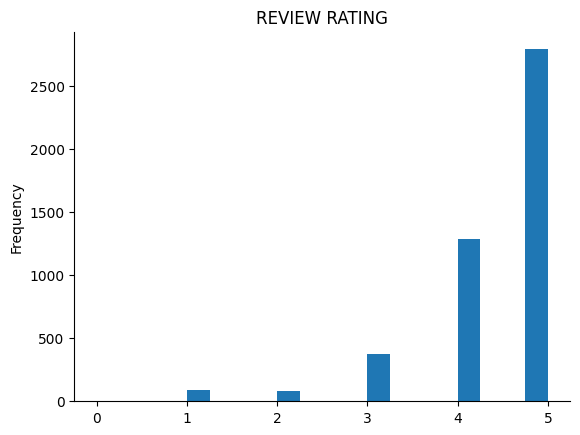

In [ ]:
unique_reviews['REVIEW RATING'].plot(kind='hist', bins=20, title='REVIEW RATING')
plt.gca().spines[['top', 'right',]].set_visible(False)

The x-axis is labeled "REVIEW RATING", which suggests that each bar corresponds to a specific rating score. It looks like the ratings range from 0 to 5.

The y-axis is labeled "Frequency", which indicates the number of times each rating occurs.

The bars themselves represent the count of reviews for each rating:

1. Rating of 0 has a very low frequency, close to 0.
2. Rating of 1 also has a very low frequency, though slightly higher than 0.
3. Rating of 2 shows a small increase in frequency compared to 1.
4. Rating of 3 has a substantially higher frequency, indicating more reviews have this rating.
5. Rating of 4 is less frequent than 3 but still represents a significant number of reviews.
6. Rating of 5 has the highest frequency by a large margin, suggesting that this is the most common review rating.

From this chart, we can infer that the most common review rating given is 5, indicating possibly positive feedback or satisfaction. Ratings of 4 and 3 are also common, but to a lesser extent. Ratings of 0 and 1 are quite rare, suggesting few negative reviews.

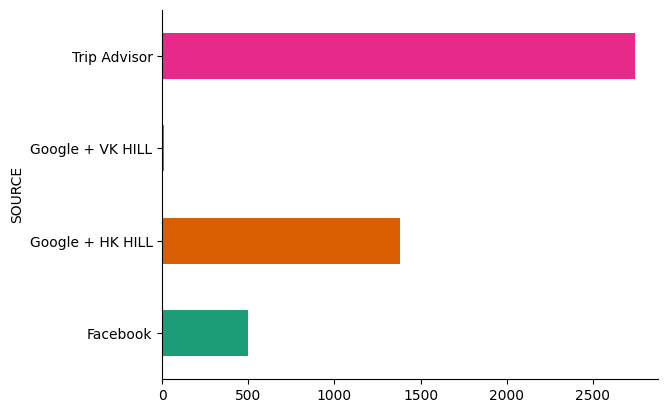

In [ ]:
import seaborn as sns
unique_reviews.groupby('SOURCE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Each bar represents a source, and the length of the bar indicates the number of reviews from that source.

1. "Trip Advisor" has the highest number of reviews, with over 2500 reviews.
2. "Google + VK HILL" is the second source with an intermediate number of reviews, around 1000.
3. "Google + HK HILL" follows with fewer reviews than "Google + VK HILL", slightly less than 1000 reviews.
4. "Facebook" has the least number of reviews among the sources listed, with around 250 reviews.

From this visualization, we can conclude that Trip Advisor is the most popular platform for reviews among the ones listed, followed by Google variants and then Facebook.

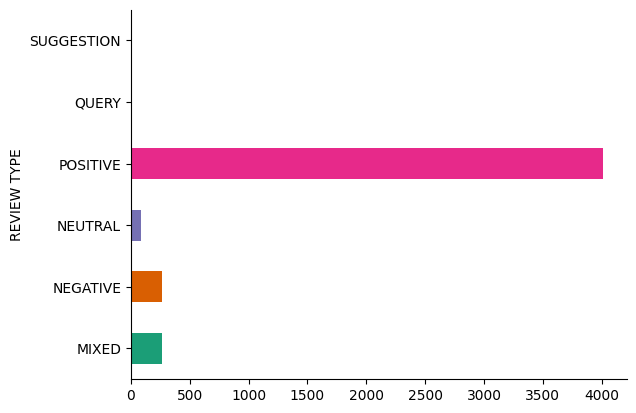

In [ ]:
unique_reviews.groupby('REVIEW TYPE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Each bar corresponds to a review type, and the length of the bar shows how many reviews fall into each category.

1. POSITIVE: This category has the most reviews by a significant margin, with the count approaching 4000. This suggests that the majority of the reviews are positive.
2. NEGATIVE: A smaller number of reviews are negative, with the count around 500.
3. MIXED: There are even fewer mixed reviews, indicated by the shorter bar around the 250 mark.
4. NEUTRAL: The count for neutral reviews is similar to that of mixed reviews, close to 250 as well.
5. QUERY: Only a very small number of reviews are queries, indicated by a bar length of around 100.
6. SUGGESTION: The count for suggestions is minimal, barely visible on the plot, suggesting very few such reviews exist in the dataset.

The chart provides insight into the sentiment distribution of the reviews. The overwhelming number of positive reviews could reflect high customer satisfaction or a positive perception of the product/service being reviewed. In contrast, negative and mixed reviews are present but much less common, and neutral reviews have a similar low presence. Very few reviews are categorized as queries or suggestions, which might imply that the platform is not commonly used for asking questions or providing feedback in the form of suggestions.

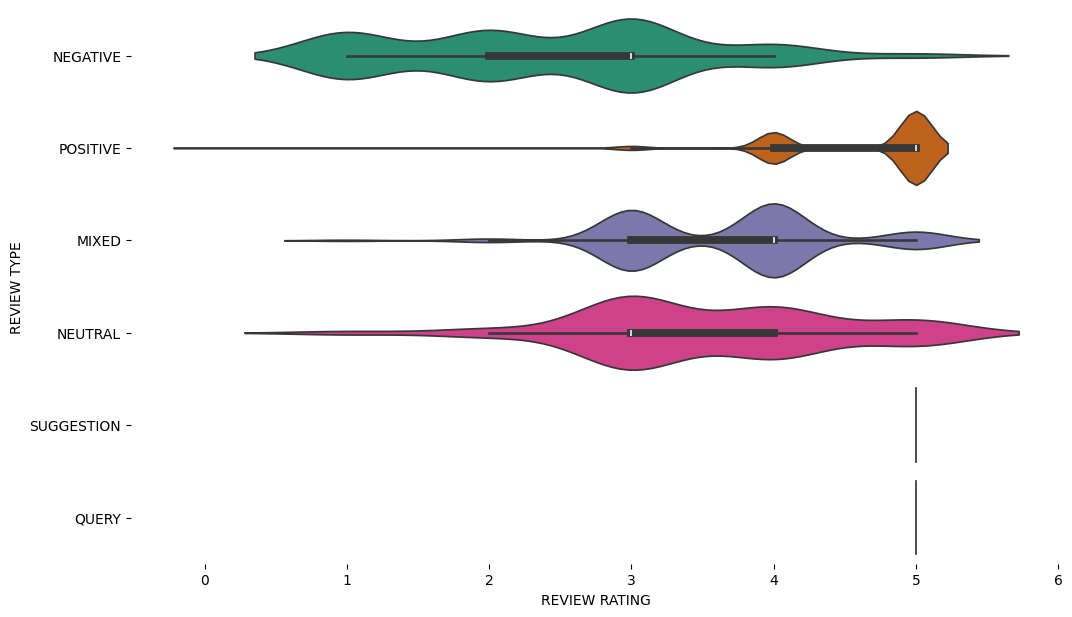

In [ ]:
figsize = (12, 1.2 * len(unique_reviews['REVIEW TYPE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='REVIEW RATING', y='REVIEW TYPE', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Each 'violin' represents the distribution of review ratings for a particular type of review, with the following observations:

1. QUERY: Appears as a single point, which could indicate there is only one query review with a specific rating (likely a 5, considering the scale).
SUGGESTION: Also looks like a single point or a very narrow distribution, suggesting very few suggestion reviews, potentially with a perfect rating as well.

2. NEUTRAL: The distribution is wider, showing variability in ratings. The thick black bar, likely representing the interquartile range, suggests most ratings are centered around 4.

3. MIXED: This distribution is wider and flatter, implying a range of ratings from 2 to 5. It has two peaks, which may suggest bimodal tendencies in the ratings for mixed reviews, clustering around the lower and higher values.

4. POSITIVE: The widest distribution, with the majority of ratings at 5. The distribution's shape indicates a high frequency of top ratings, which is consistent with the positive nature of these reviews.

5. NEGATIVE: This violin has a distribution that seems to spread across ratings 1 to 3, which is in line with its negative sentiment, and it shows that most negative reviews are rated 1.

The width of each 'violin' shows the density of data points at different rating levels, with wider sections representing a higher density of reviews. The thin lines, or whiskers, extend to show the range of the data, while the thicker section in the middle likely represents the interquartile range. The white dot might represent the median of the data.

Overall, the plot indicates that positive reviews are most commonly rated 5, while negative reviews generally receive the lowest ratings. Mixed and neutral reviews show a broader range of ratings, with neutral reviews leaning towards higher ratings. Suggestions and queries seem to be rated favorably, although there's not enough data to fully assess their distribution.

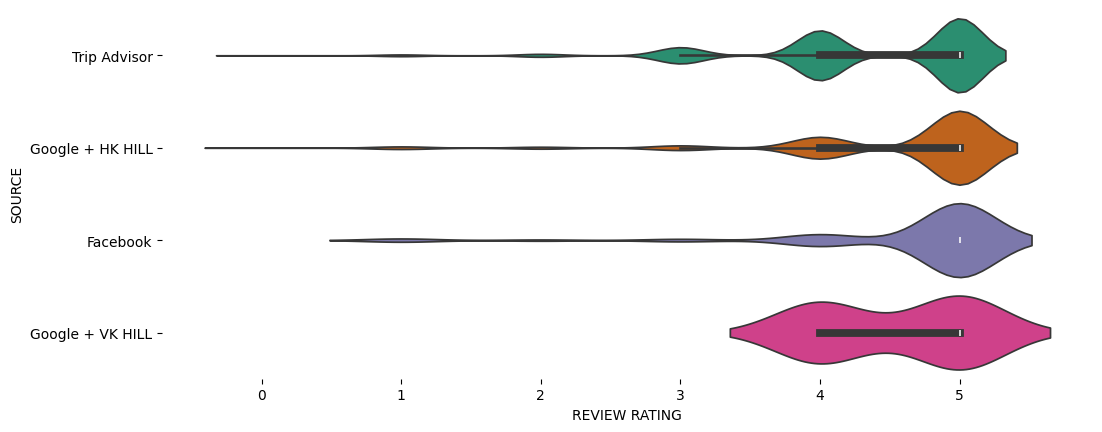

In [ ]:
figsize = (12, 1.2 * len(unique_reviews['SOURCE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='REVIEW RATING', y='SOURCE', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Each 'violin' represents the distribution of review ratings for a particular type of review, with the following observations:

1. Trip Advisor: Shows a bimodal distribution with peaks around ratings 2 and 4, indicating that reviews from Trip Advisor tend to either be around average or above average but not the highest.

2. Google + HK HILL: Displays a narrower distribution with a peak around the rating of 3. This suggests that reviews from this source are commonly around the mid-range.

3. Facebook: This violin is narrow and centered around a rating of 4, indicating a consistent distribution of mostly positive reviews from Facebook.

4. Google + VK HILL: Has the widest distribution, with a density that is spread out from ratings 1 to 5, but most concentrated around 5. It implies a wide range of ratings, but with a preference for higher ratings.

Key takeaways:

Reviews from Google + VK HILL have the broadest range of ratings but are generally very positive.

Reviews from Facebook are also positive, with less variation in the ratings.
Trip Advisor shows more variation, with a tendency to have both average and above-average ratings.

Google + HK HILL reviews tend to center around the middle rating.

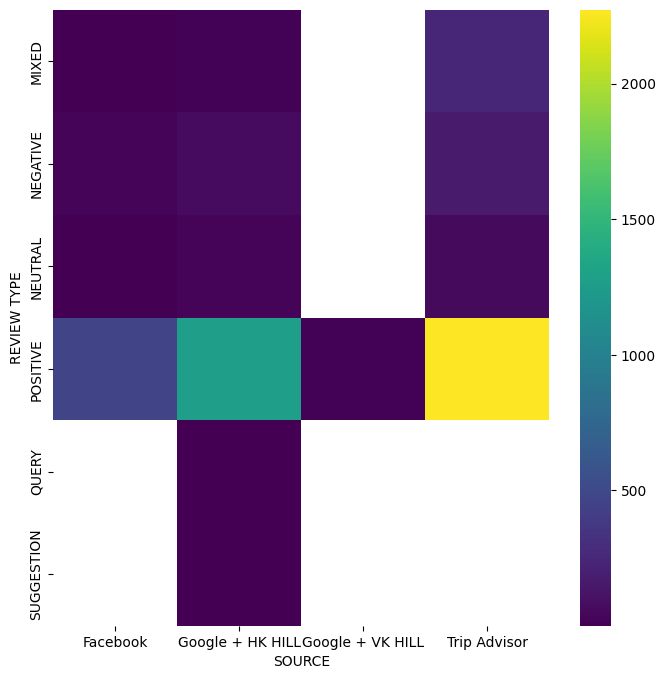

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['REVIEW TYPE'].value_counts()
    for x_label, grp in unique_reviews.groupby('SOURCE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('SOURCE')
_ = plt.ylabel('REVIEW TYPE')

The plot is a heatmap displaying the count of reviews by type for different sources. The horizontal axis represents the sources of reviews (Facebook, Google + HK HILL, Google + VK HILL, Trip Advisor), while the vertical axis represents the types of reviews (SUGGESTION, QUERY, POSITIVE, NEUTRAL, NEGATIVE, MIXED). The color intensity reflects the number of reviews, with lighter colors indicating fewer reviews and darker colors representing more reviews, as per the color bar on the right side.

1. Trip Advisor: Has a significantly large number of positive reviews, indicated by the yellow block, which is the brightest and therefore has the highest count. There are very few or possibly no suggestions, queries, or mixed-type reviews on Trip Advisor, as indicated by the lack of color in those rows.

2. Google + VK HILL: Shows a notable number of positive reviews as well, though not as many as Trip Advisor, as seen by the slightly darker shade of purple.

3. Google + HK HILL: Appears to have a moderate number of reviews across negative, positive, and neutral categories, with negative reviews being slightly more prevalent.

4. Facebook: Shows the least variation in review type, with the majority being negative or positive, as suggested by the single dark purple block under the negative category and a lighter block under the positive category.

Overall, the heatmap suggests that Trip Advisor is the predominant source for positive reviews, while Google + HK HILL has a more balanced distribution of positive and negative reviews. Facebook, although less prominent, appears to be a source of negative reviews. The heatmap lacks data for queries and suggestions across all sources, which might imply that such types of reviews are either not common or not captured for these sources. Mixed reviews are also relatively uncommon or not recorded.

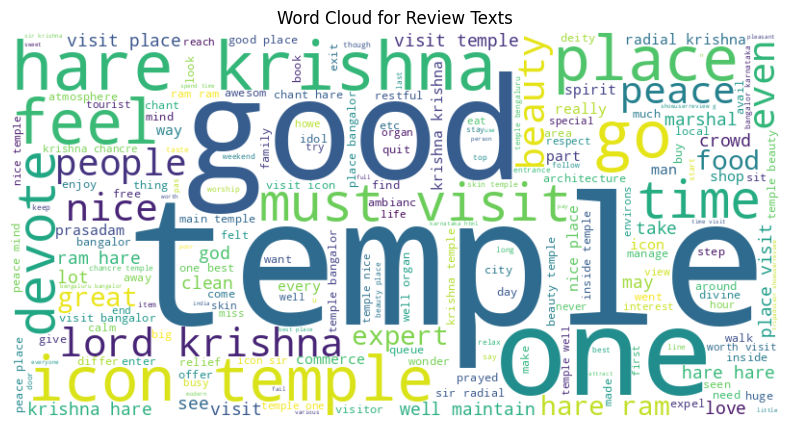

In [ ]:
from wordcloud import WordCloud

combined_reviews = ' '.join(unique_reviews['text'].values)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Texts')
plt.show()

The image is a word cloud, which is a visual representation of text data where the size of each word indicates its frequency or importance in the dataset. In this word cloud for review texts, the most prominent words are "Hare," "Krishna," "Temple," and "Place," suggesting that these are the most frequently occurring words in the reviews.

The words "Good," "Visit," "Nice," and "Great" are also quite visible, which could imply positive sentiment in the reviews. The presence of words like "Peace," "Love," and "Enjoy" further reinforces the positive nature of the reviews.


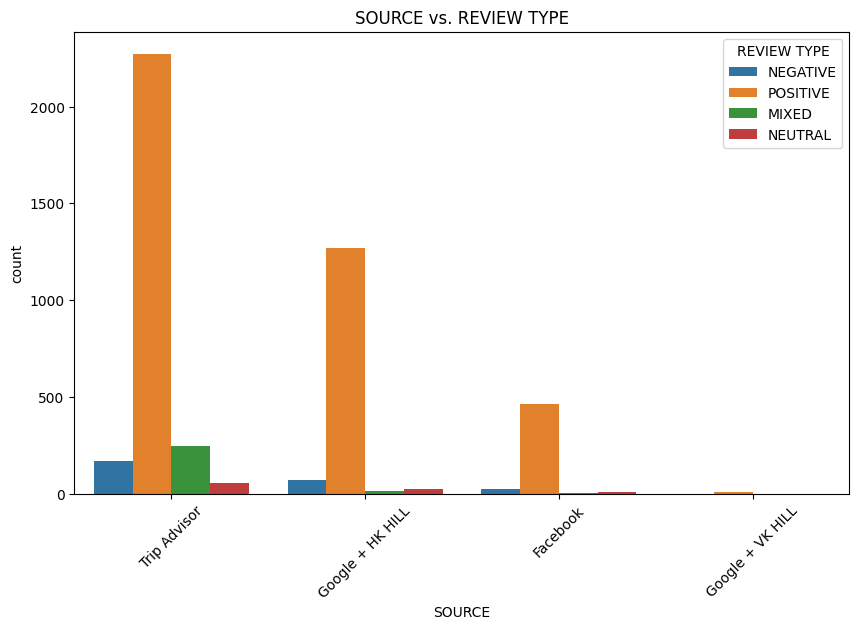

In [ ]:
df_2 = unique_reviews[~unique_reviews['REVIEW TYPE'].isin(['QUERY', 'SUGGESTION'])]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_2, x='SOURCE', hue='REVIEW TYPE')
plt.title('SOURCE vs. REVIEW TYPE')
plt.xticks(rotation=45)
plt.legend(title='REVIEW TYPE')
plt.show()

The plot appears to be a grouped bar chart showing the count of reviews by type for different sources.

1. Trip Advisor: Has the highest number of reviews overall. It shows a very large number of positive reviews, a moderate number of neutral reviews, and relatively few mixed and negative reviews.

2. Google + HK HILL: Also has a significant number of reviews, again dominated by positive ones. The numbers of neutral, mixed, and negative reviews are much smaller in comparison.

3. Facebook: Has a lower total number of reviews. It shows a moderate count of positive reviews, but the count for negative, mixed, and neutral reviews is small.

4. Google + VK HILL: Has the lowest total number of reviews among the sources listed. Positive reviews are present but in a small count, and there are very few mixed and negative reviews, while neutral reviews are almost non-existent.

From this visualization, we can infer that Trip Advisor and Google + HK HILL are the most prominent platforms for reviews, with a strong tendency towards positive feedback. Facebook has fewer reviews, with a preference for positive ones, while Google + VK HILL has the fewest reviews, with an inclination towards positive but still very few in number.

The colors represent different review types, with blue for negative, orange for positive, green for mixed, and red for neutral. The distribution of colors across sources indicates that positive reviews are predominant across all platforms. The chart suggests that those looking for reviews are most likely to find positive feedback on Trip Advisor and Google + HK HILL, and to a lesser extent, on Facebook and Google + VK HILL. Mixed and negative reviews are relatively rare across all sources.

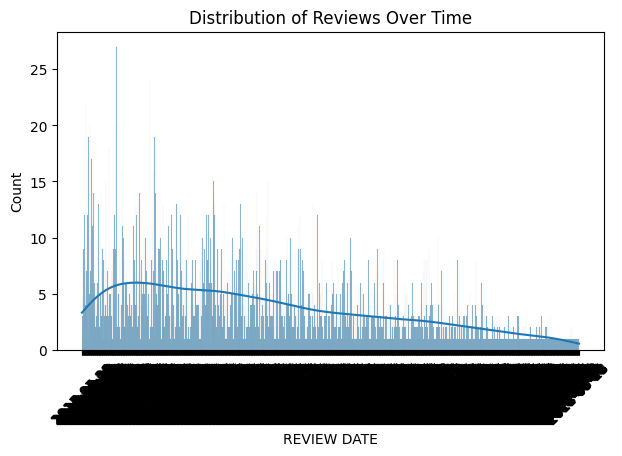

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 4)
sns.histplot(data=unique_reviews, x='REVIEW DATE', bins=30, kde=True)
plt.xticks(rotation=45)
plt.title('Distribution of Reviews Over Time')

plt.tight_layout()
plt.show()

Feature Extraction, Feature Selection, and Supervised ML Model for Sentiment Prediction with Data Split: 60% Training,  20% Test, 20% Validation. Evaluate Model Performance.

In [ ]:
stop_words = stopwords.words('english')

v = TfidfVectorizer(
    ngram_range=(1, 2),
    stop_words=stop_words
)

sparse_matrix_tfidf = v.fit_transform(unique_reviews['text'])
features_df = pd.DataFrame(sparse_matrix_tfidf.toarray(), columns=v.get_feature_names_out())

tfidf_weight = sum(sparse_matrix_tfidf).toarray()[0]

words_tfidf = pd.DataFrame(tfidf_weight, index=v.get_feature_names_out(), columns=['TF-IDF Weight'])
words_tfidf.sort_values(by='TF-IDF Weight', inplace=True, ascending=False)

words_tfidf.head()

,TF-IDF Weight
temple,194.446819
place,174.446878
visit,125.535718
good,116.295363
nice,116.122784


In [ ]:
len(words_tfidf)

51806

In [ ]:
var = words_tfidf.index[:1000]

In [ ]:
a = features_df[var]
a

,temple,place,visit,good,nice,krishna,hare,peace,bangalor,beauty,...,bangalor icon,charge,half,air,food option,wed,bangalor beauty,much commerce,beauty well,article
0,0.063086,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.049364,0.000000,0.000000,0.080057,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.073400,0.086366,0.091860,0.000000,0.0,0.000000,0.000000,0.12715,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.142275,0.075663,0.000000,0.0,0.089666,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4627,0.000000,0.000000,0.000000,0.000000,0.0,0.038492,0.000000,0.00000,0.000000,0.045673,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4628,0.099822,0.000000,0.000000,0.000000,0.0,0.059220,0.043663,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4629,0.045458,0.035659,0.018964,0.000000,0.0,0.022474,0.000000,0.00000,0.025247,0.026667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4630,0.000000,0.000000,0.000000,0.081064,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
unique_reviews['Review_type_Transform'] = label_encoder.fit_transform(unique_reviews['REVIEW TYPE'])
X = a
y = unique_reviews['Review_type_Transform']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Initializing the Multinomial Naive Bayes classifier.
# Multinomial Naive Bayes is particularly suited for classification with discrete features (e.g., word counts for text classification).
mnb = MultinomialNB()

# Training the Multinomial Naive Bayes classifier using the training data.
# X_train contains the feature vectors of the training data, and y_train contains the corresponding target values (labels).
bayes = mnb.fit(X_train, y_train)

# Predicting the target values (labels) for the validation dataset using the trained classifier.
# X_val contains the feature vectors of the validation data.
# y_pred will hold the predicted labels for each entry in the validation dataset.
y_pred = bayes.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_val, y_pred)

0.8705501618122977

In [ ]:
y_pred2 = bayes.predict(X_test)
accuracy_score(y_test, y_pred2)

0.8833693304535637

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

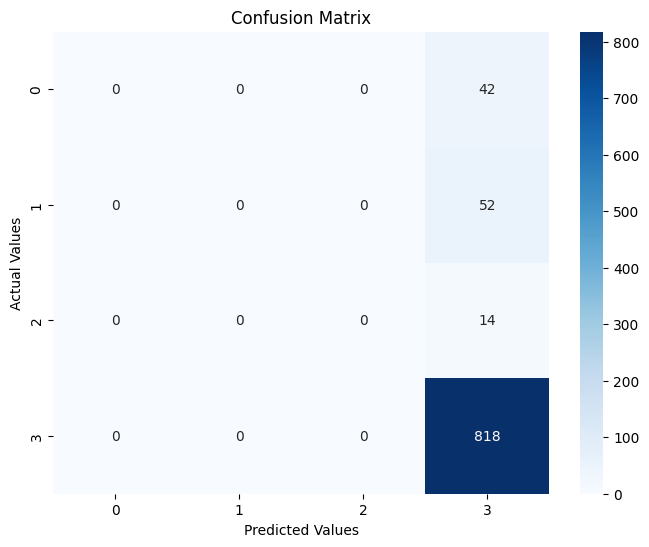

In [ ]:
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix represents a classifier's performance, with actual classes on the y-axis and predicted classes on the x-axis:

Class 0: There are no instances of this class in the actual data, or the classifier did not predict any instance as class 0.

Class 1: Similar to class 0, there are no instances of class 1 predicted or actually present in the data.

Class 2: The classifier did not predict any instances as class 2, but there were 14 actual instances. All were misclassified as class 3, indicating potential issues with the classifier's ability to distinguish class 2 or class imbalance.

Class 3: The classifier predicted 926 instances as class 3. Out of these, 818 were correctly classified (true positives), while 108 instances (42 from class 0, 52 from class 1, and 14 from class 2) were misclassified as class 3.

Only 1 class is being predicted due to class imbalance.

Addressing Imbalanced Data with Proper Sampling Strategy and Evaluate Model Performance.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Creating an instance of RandomOverSampler.
# This technique helps to overcome the issue of class imbalance by randomly duplicating examples in the minority class.
# 'random_state=42' ensures reproducibility of the results by setting a seed for the random number generator.
# 'shrinkage=None' specifies that shrinkage is not applied. Shrinkage can be used to make the synthetic samples
# more general by moving them towards the class centroid, but here we are not using that option.
sampler = RandomOverSampler(random_state=42, shrinkage=None)

# Applying the sampler to the dataset to balance the classes.
# X contains the feature vectors of the data, and y contains the corresponding target values (labels).
# X_res and y_res are the resampled feature vectors and target values, respectively.
X_res, y_res = sampler.fit_resample(X, y)

# Counting the number of occurrences of each class in the resampled target array to verify the balancing effect.
# 'np.unique' with the argument 'return_counts=True' returns the unique elements found in y_res and their counts.
unique, counts = np.unique(y_res, return_counts=True)

print(unique, counts)

[0 1 2 3 4 5] [4013 4013 4013 4013 4013 4013]


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X_res, y_res, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
mnb = MultinomialNB()
bayes = mnb.fit(X_train, y_train)
y_pred2 = bayes.predict(X_val)
accuracy_score(y_val, y_pred2)

0.7971345514950167

In [ ]:
y_pred = bayes.predict(X_test)
accuracy_score(y_test, y_pred)

0.8052325581395349

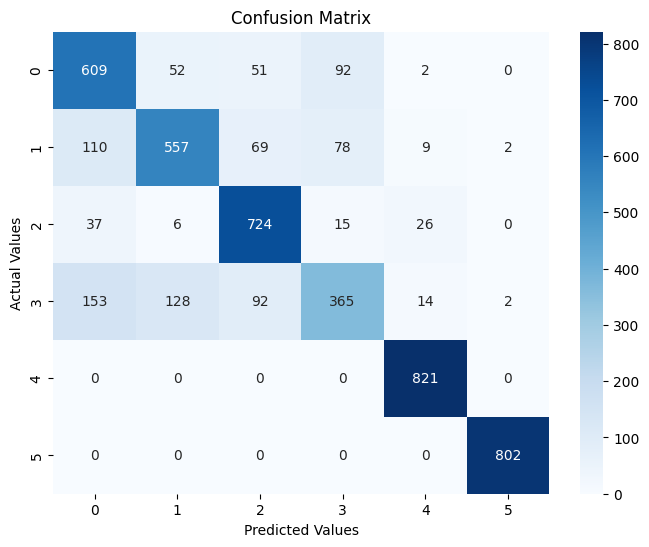

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

1. The matrix's diagonal (from top left to bottom right) shows the number of correct predictions for each class: 609 for class 0, 557 for class 1, 724 for class 2, 365 for class 3, 821 for class 4, and 802 for class 5.

2. The off-diagonal cells show the misclassifications: for example, 110 instances of class 0 were misclassified as class 1, 153 instances of class 0 as class 3, and so on for other classes.

3. The model performs well for class 4 and 5 with high true positives and relatively fewer misclassifications, while it appears to struggle more with class 0, 1, and 3, where there is a higher number of misclassifications.

4. The lighter colors in non-diagonal cells, especially between classes 0, 1, and 3, suggest that the model often confuses these classes with one another.

Before over-sampling, the model were predicting all 1s due to which accuracy was high due to class imbalance, whereas after over-sampling, the model predicts different classes.

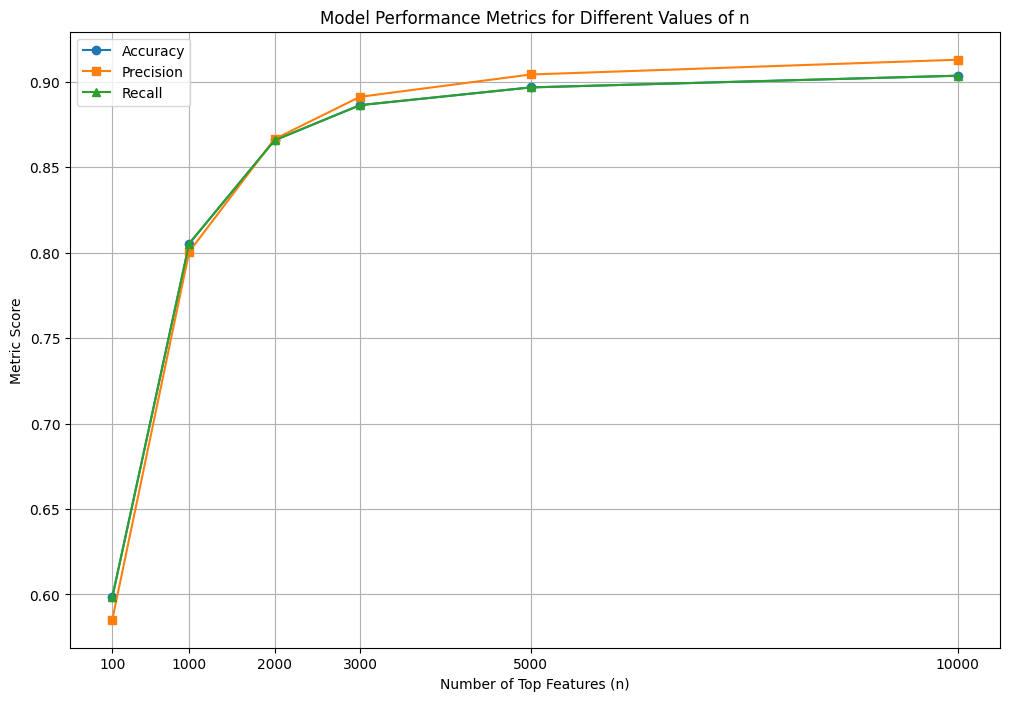

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score

n_values = [100, 1000, 2000, 3000, 5000, 10000]
accuracies = []
precisions = []
recalls = []

label_encoder = LabelEncoder()
unique_reviews['Review_type_Transform'] = label_encoder.fit_transform(unique_reviews['REVIEW TYPE'])

y = unique_reviews['Review_type_Transform']

for n in n_values:

    var = words_tfidf.index[:n]
    a = features_df[var]

    X = a

    sampler = RandomOverSampler(random_state=42, shrinkage=None)
    X_res, y_res = sampler.fit_resample(X, y)

    X_train, X_temp, y_train, y_temp = train_test_split(X_res, y_res, test_size=0.4, random_state=42)
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    mnb = MultinomialNB()
    bayes = mnb.fit(X_train, y_train)

    y_pred_test = bayes.predict(X_test)

    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')

    accuracies.append(test_accuracy)
    precisions.append(test_precision)
    recalls.append(test_recall)

plt.figure(figsize=(12, 8))
plt.plot(n_values, accuracies, marker='o', label='Accuracy')
plt.plot(n_values, precisions, marker='s', label='Precision')
plt.plot(n_values, recalls, marker='^', label='Recall')

plt.title('Model Performance Metrics for Different Values of n')
plt.xlabel('Number of Top Features (n)')
plt.ylabel('Metric Score')
plt.xticks(n_values)
plt.legend()
plt.grid(True)
plt.show()

The plot is a line graph depicting how three different performance metrics—accuracy, precision, and recall—vary with the number of top features used in a model.

1. Performance Improvement: As the number of features increases from 100 to around 1000, there's a significant improvement in all three metrics. This suggests that including more relevant features up to a point greatly benefits the model's performance.

2. Performance Plateau: Beyond 1000 features, all three metrics level off, indicating that adding more features does not substantially improve the model's performance. This could imply that the most informative features are captured within the top 1000.

3. Close Metric Values: The lines for accuracy, precision, and recall are very close to each other, especially from 2000 features onwards. This suggests a balanced performance of the model across these metrics, which is ideal in a well-rounded classification model.

4. Optimal Feature Count: Given the plateau, it might be computationally more efficient to limit the number of features to the point where increasing them does not significantly enhance the model's performance, which appears to be around 2000 based on this plot.

The graph indicates that the model has found an equilibrium in performance, and using more than 2000 features might not be necessary, which could save computational resources and prevent overfitting.

Predicting the Sentiment of the Review using Unsupervised Learning.

In [ ]:
text = """ A unique temple happy unique sad"""

In [ ]:
!pip install Afinn

In [ ]:
from afinn import Afinn

# Creating an instance of the Afinn class.
# Afinn is a sentiment analysis tool that rates the sentiment in text data,
# returning a score that can be positive (positive sentiment), negative (negative sentiment), or zero (neutral).
afinn = Afinn()

# Defining a function to compute the Afinn sentiment score for a given piece of text.
# The function takes a string 'text' as input and returns a sentiment score as an integer.
def afinn_score(text):
    return afinn.score(text)

# Applying the 'afinn_score' function to each element in the 'text' column of the 'unique_reviews' DataFrame.
# The result is a new column in the DataFrame called 'afinn_score' where each entry is the sentiment score
# of the corresponding text in the 'text' column.
unique_reviews['afinn_score'] = unique_reviews['text'].apply(afinn_score)

unique_reviews.head()

,REVIEW ID,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE,Review_type_Transform,afinn_score
0,656,Trip Advisor,3612,2014-04-30,To commercial,reativli new temple big hindu version dinner l...,2,NEGATIVE,1,3.0
1,2208,Trip Advisor,9573519851,2015-07-24,?Amazing temple in Bangalore?,superb,5,POSITIVE,3,5.0
2,3989,Trip Advisor,0iamsid0,2017-01-03,Fully commercialized place,give star felt shop mall instead of temple oth...,4,NEGATIVE,1,3.0
3,4561,Trip Advisor,1 All over,2017-04-02,Off the beaten path,best peace place great infrastructure love vis...,5,POSITIVE,3,11.0
4,3334,Trip Advisor,10vee,2016-08-29,Peaceful and Serene place,tranquil amidst business place place worth vis...,5,POSITIVE,3,4.0


In [ ]:
!pip install swifter

In [ ]:
import swifter

# Defining a function to categorize sentiment scores into descriptive categories.
# The function 'map_sentimen' takes a single argument 'afinn_score', which is a numerical sentiment score.
# It returns a string label describing the sentiment based on the score:
# "Negative" for scores less than 0, "Positive" for scores greater than 0, and "Mixed" for a score of 0.

def map_sentimen(afinn_score):
    if afinn_score < 0:
        return "Negative"
    elif afinn_score > 0:
        return "Positive"
    else:
        return "Mixed"

unique_reviews['sentiment_category'] = unique_reviews['afinn_score'].swifter.apply(map_sentimen)

Pandas Apply:   0%|          | 0/4632 [00:00<?, ?it/s]

In [ ]:
unique_reviews.head()

,REVIEW ID,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE,Review_type_Transform,afinn_score,sentiment_category
0,656,Trip Advisor,3612,2014-04-30,To commercial,reativli new temple big hindu version dinner l...,2,NEGATIVE,1,3.0,Positive
1,2208,Trip Advisor,9573519851,2015-07-24,?Amazing temple in Bangalore?,superb,5,POSITIVE,3,5.0,Positive
2,3989,Trip Advisor,0iamsid0,2017-01-03,Fully commercialized place,give star felt shop mall instead of temple oth...,4,NEGATIVE,1,3.0,Positive
3,4561,Trip Advisor,1 All over,2017-04-02,Off the beaten path,best peace place great infrastructure love vis...,5,POSITIVE,3,11.0,Positive
4,3334,Trip Advisor,10vee,2016-08-29,Peaceful and Serene place,tranquil amidst business place place worth vis...,5,POSITIVE,3,4.0,Positive


In [ ]:
unique_reviews['afinn_score'].unique()

array([  3.,   5.,  11.,   4.,  10.,  -1.,   6.,   7.,   9.,   8.,  12.,
         1.,   2.,  -2.,   0.,  14.,  19.,  13.,  15.,  -3.,  17.,  16.,
        18.,  24.,  20.,  44.,  26.,  25.,  -4.,  22.,  28.,  -5.,  33.,
        39.,  23.,  27.,  -6.,  21.,  31., -11.,  -7.,  49., -15.,  29.,
        34.,  38.])

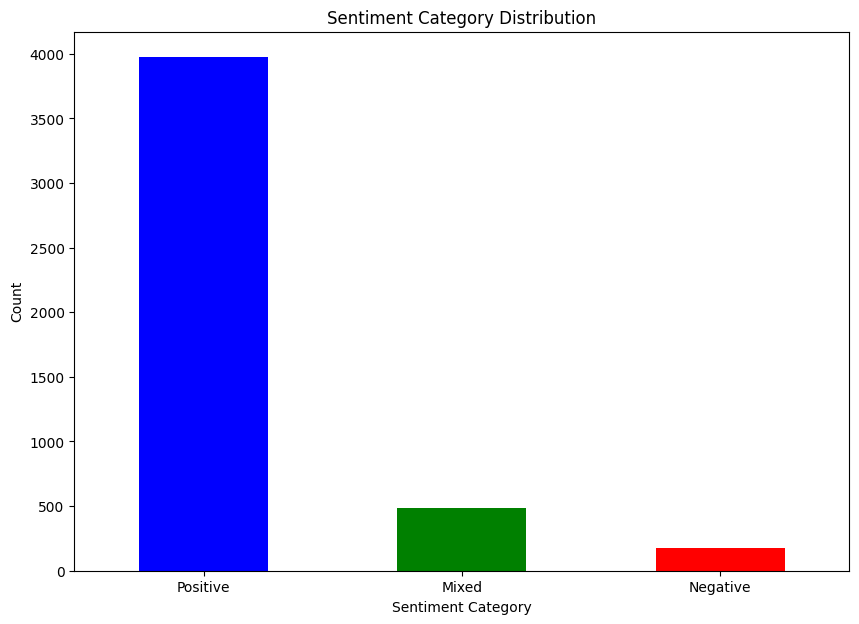

In [ ]:
sentiment_counts = unique_reviews['sentiment_category'].value_counts()

plt.figure(figsize=(10, 7))
sentiment_counts.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


The bar chart visualizes the distribution of sentiment categories across a dataset.

The 'Positive' category has the highest count, dominating the dataset with a significant number of instances.

The 'Mixed' sentiment category has a considerably lower count, suggesting that there are fewer reviews with a neutral or mixed sentiment.

The 'Negative' category has the lowest count, indicating that negative sentiments are the least common in the dataset. This distribution suggests a generally positive reception or opinion in the analyzed reviews.

8. What are the overall insights from this text-mining process?

I have first done data pre-processing. The tasks performed under this are:

•	Contraction Replacement: Contraction replacement is the process of expanding shortened forms of words or phrases (like "isn't" to "is not").

•	Removing Numbers and Symbols

•	Set all characters to lowercase

•	Slang Correction: Convert slangs to normal English.

•	Removing Stop Words: Stopwords are commonly used words (such as "the", "is", "in") that are often removed in natural language processing to focus on more meaningful words.

•	Translating Hindi to English
•	Stemming: Stemming reduces words to their root form, helping to normalize text and combine variations of a word for more efficient processing in natural language tasks.

•	Spell Correction

•	Lemmatization: Lemmatization converts words to their dictionary form, improving text analysis by accurately grouping together different inflected forms of a word.

After this, I have implemented Feature Extraction using TF-IDF technique. The TF-IDF value increases proportionally to the number of times a word appears in the document and is offset by the inverse of the number of documents or reviews that contain the word. The TF-IDF score assigned to each word represents the importance of that word in a particular feedback. Features with higher TF-IDF scores can be selected for sentiment analysis.

"temple" has the highest TF-IDF weight, indicating that it is a significant term across the reviews
"place" is the next most significant term, suggesting it's also a common and important word

Total Words in the Dataset are: 51806

For performing Sentiment Prediction using Supervised ML Model, I have used Bayes Multi-Classification. For predictor, I have label encoded the ‘REVIEW TYPE’ column and words with top 1000 TF_IDF weights as features.

The high validation and test accuracies (87% and 88.3%, respectively) indicate that the Multinomial Naive Bayes model was successful in classifying the review types based on the text's TF-IDF features. This suggests that the features extracted carry significant information about the sentiment and content of the reviews.

The fact that a Naive Bayes classifier performed well suggests that certain words and bi-grams (two-word combinations) are good predictors of the review type, which implies a strong correlation between specific terms used in the reviews and their classified sentiments. The similar performance on both validation and test sets suggests that the model generalizes well to unseen data, which is a positive indicator of the model's robustness.

After this, I have performed Random Over Sampling. It is performed to balance the class distribution in a dataset by randomly duplicating instances of the minority class. We cannot apply under sampling or SMOTE because some of the classes in our dataset have only 1 sample. Under sampling requires more than one instance of a class to reduce the dataset size , and SMOTE requires at least two instances to synthesize new samples.

After over sampling, the validation accuracy decreased to 80% and test accuracy decreased to 80.5%

For Prediction of Sentiment of Review using Unsupervised Learning, I used Afinn Lexicon.

The Afinn scores ranged from -15 to 49.

It quantitatively assesses the sentiment of review texts, providing a sentiment score for each review. The Afinn scores help identify the polarity of sentiments (positive, negative, neutral) present in the review text data. Afinn provides a straightforward approach to sentiment analysis without the need for complex machine learning models or extensive pre-processing.
